Sabemos que SIFT utiliza un vector de 128 dimensiones para los descriptores. Dado que utiliza números de punto flotante, se necesitan básicamente 512 bytes. De manera similar, SURF también ocupa un mínimo de 256 bytes (para 64-dim). Crear un vector de este tipo para miles de funciones requiere mucha memoria, lo que no es factible para aplicaciones con restricciones de recursos, especialmente para sistemas integrados. Cuanto mayor sea la memoria, mayor será el tiempo necesario para hacer coincidir.

Pero es posible que todas estas dimensiones no sean necesarias para una correspondencia real. Podemos comprimirlo usando varios métodos como PCA, LDA, etc. Incluso se usan otros métodos como hash usando LSH (Locality Sensitive Hashing) para convertir estos descriptores SIFT en números de punto flotante en cadenas binarias. Estas cadenas binarias se utilizan para hacer coincidir características utilizando la distancia de Hamming. Esto proporciona una mayor aceleración porque encontrar la distancia de hamming es simplemente aplicar XOR y recuento de bits, que son muy rápidos en las CPU modernas con instrucciones SSE. Pero aquí, primero necesitamos encontrar los descriptores, luego solo nosotros podemos aplicar hash, lo que no resuelve nuestro problema inicial en la memoria.

BREVE entra en escena en este momento. Proporciona un atajo para buscar cadenas binarias directamente sin encontrar descriptores. Toma un parche de imagen suavizado y selecciona un conjunto denorted(x,y) pares de ubicaciones de una manera única (explicada en el artículo). Luego se realizan algunas comparaciones de intensidad de píxeles en estos pares de ubicaciones. Por ejemplo, sean los primeros pares de ubicacionespagyq. SiI( p ) < yo( q), entonces su resultado es 1, de lo contrario es 0. Esto se aplica para todos losnortedpares de ubicaciones para obtener unanorted-cadena de bits dimensional.

STAR (censurE) en OpenCV.

STAR es un detector de características derivado de CenSurE. Sin embargo, a diferencia de CenSurE, que utiliza polígonos como cuadrados, hexágonos y octágonos para acercarse a un círculo, Star emula un círculo con 2 cuadrados superpuestos: 1 vertical y 1 girado 45 grados. Estos polígonos son de dos niveles. Pueden verse como polígonos con bordes gruesos. Las fronteras y el recinto cerrado tienen pesos de signos opuestos. Tiene mejores características computacionales que otros detectores de espacio a escala y es capaz de implementarse en tiempo real. A diferencia de SIFT y SURF, que encuentran extremos en píxeles submuestreados que comprometen la precisión en escalas más grandes, CenSurE crea un vector de características utilizando resolución espacial completa en todas las escalas de la pirámide.

32
(224, 32)


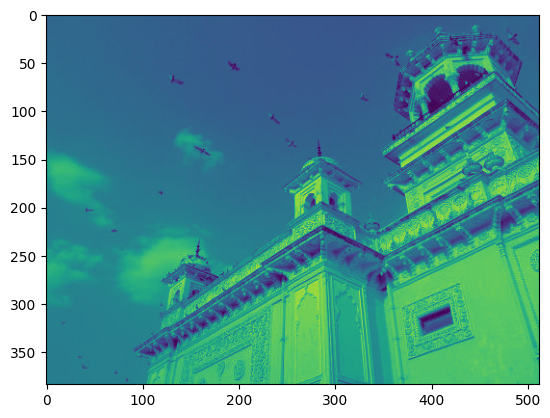

(<matplotlib.image.AxesImage at 0x7f97151e40d0>, None)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )
plt.imshow(img), plt.show()